## 获取前 n 个主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 使用虚拟数据来实验
np.random.seed(666)

X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0.0, 100.0, size=100)
X[:, 1] = 0.75 * X[:, 0] + 3.0 + np.random.normal(0.0, 10.0, size=100)

In [3]:
def demean(X):
    return X - np.mean(X, axis=0)

X = demean(X)

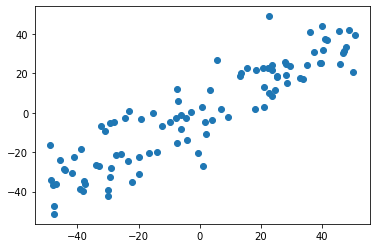

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [5]:
# 上节完成的求第一主成分的过程：
def f(w, X):
    return np.sum(X.dot(w) ** 2) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2.0 / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, init_w, eta, n_iters=1e4, epsilon=1e-8):
    i_iters = 0
    w = direction(init_w)
    
    while i_iters < n_iters:
        last_w = w
        gradient = df(w, X)
        w = last_w + eta * gradient
        w = direction(w)             # 注意1：每次求一个单位向量
        if abs(f(w, X) - f(last_w, X)) < epsilon:
            break

        i_iters += 1
    print("i_iters =", i_iters)
    return w

In [6]:
init_w = np.random.random(X.shape[1])
eta = 0.001
w1 = first_component(X, init_w, eta)
w1

i_iters = 10


array([0.77660882, 0.62998313])

## 接下来求第二主成分

In [7]:
# 从原数据中去掉第一主成分的分量
X2 = np.empty(X.shape)
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w1) * w1
    
    # X[i].dot(w) 是映射到第一主成分的向量的模
    # w 是单位向量

In [8]:
# 上面的过程可以进一步向量化：
X2 = X - X.dot(w1).reshape(-1, 1) * w1

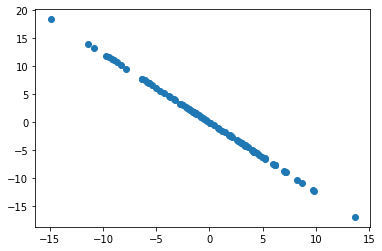

In [9]:
# 看看 X2 的数据是怎样的：
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [10]:
# 从上面的结果看，原来的二维的数据把第一主成分剥离后，就只有一维的空间，所以都聚集在一条直线上，这条直线就是它剩下的一个主成分的方向。

In [11]:
# 接下来就求第二主成分的轴(方向)

In [12]:
w2 = first_component(X2, init_w, eta)
w2

i_iters = 87


array([-0.62996636,  0.77662242])

In [13]:
# 可以看出第二主成分的方向和第一主成分的方向是垂直的， 验证一下：
w1.dot(w2)

2.159491360637089e-05

## 合成一个方法，求救前 n 个主成分

In [14]:
def get_top_n_components(n, X, eta=0.01, n_iters=1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    result = []
    for i in range(n):
        init_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, init_w, eta)
        result.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
    return result

In [15]:
# 测试一下
get_top_n_components(2, X)

i_iters = 5
i_iters = 15


[array([0.77660931, 0.62998252]), array([-0.62997973,  0.77661157])]